In [80]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.origin'] = 'lower'

import utils

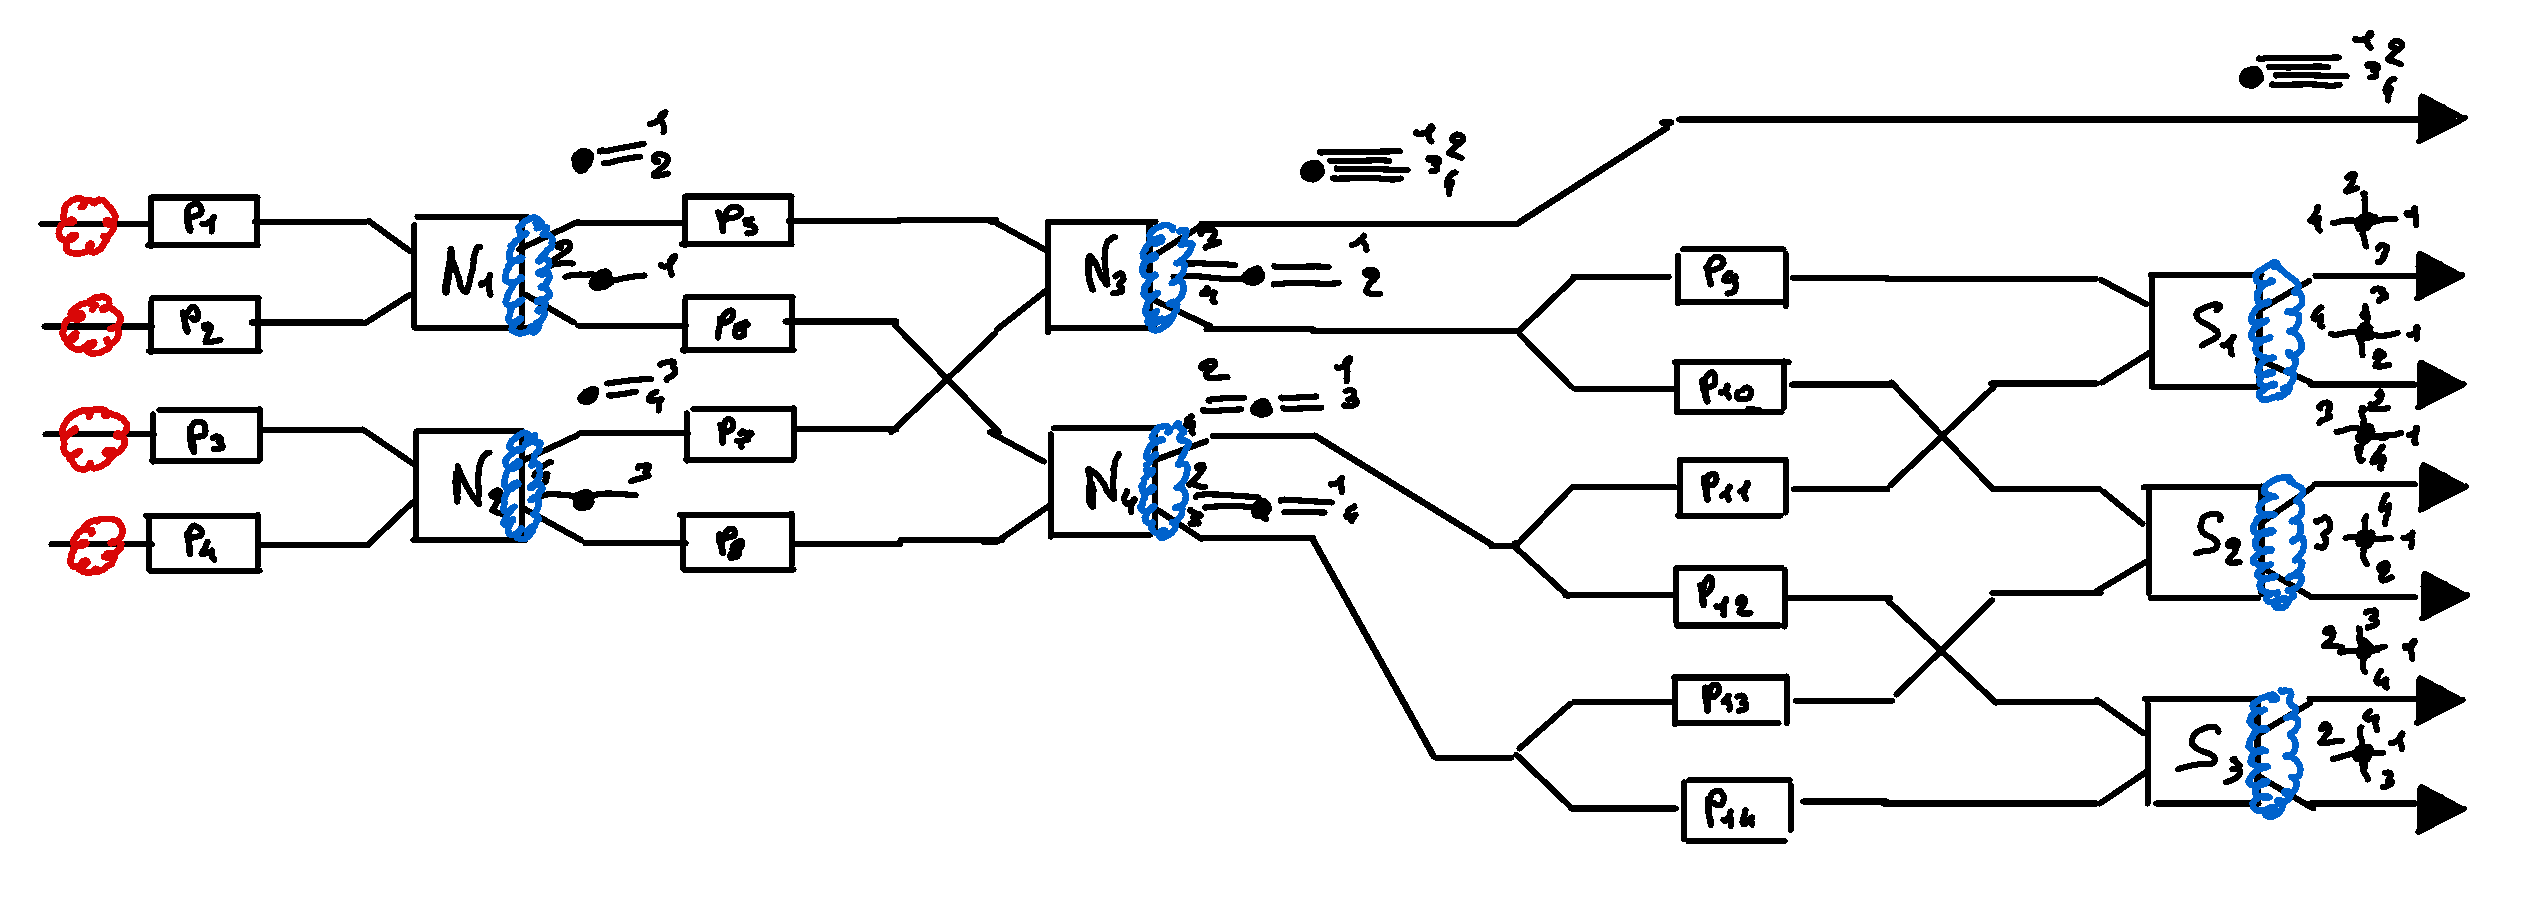

In [81]:
p = sp.IndexedBase('p') # perturbation + correction

alpha = sp.IndexedBase('alpha')
gamma = sp.IndexedBase('gamma')

o = sp.symbols('o', cls=sp.Idx) # origin (source) of the signal/aberation
n = sp.symbols('n', cls=sp.Idx) # channel number

c = sp.symbols('c', cls=sp.Idx) # component
i = sp.symbols('i', cls=sp.Idx) # index

theta = sp.symbols(r'\theta', real=True) # angle of the source

In [82]:
perturbation = alpha[c,i] * sp.exp(sp.I * gamma[c,i])
perturbation

exp(I*gamma[c, i])*alpha[c, i]

<div align=center>

---

# INPUT

</div>

4 input beams

In [83]:
x = sp.IndexedBase('x') # input signal
X = sp.Matrix([
    [x[1]],
    [x[2]],
    [x[3]],
    [x[4]]
])
X

Matrix([
[x[1]],
[x[2]],
[x[3]],
[x[4]]])

In [84]:
p_1_4 = sp.Matrix([
    [sp.exp(sp.I * p[1]), 0, 0, 0],
    [0, sp.exp(sp.I * p[2]), 0, 0],
    [0, 0, sp.exp(sp.I * p[3]), 0],
    [0, 0, 0, sp.exp(sp.I * p[4])]
])
p_1_4

Matrix([
[exp(I*p[1]),           0,           0,           0],
[          0, exp(I*p[2]),           0,           0],
[          0,           0, exp(I*p[3]),           0],
[          0,           0,           0, exp(I*p[4])]])

<div align=center>

---

# NULLER

</div>

## First Layer

In [85]:
Nlayer = 1/sp.sqrt(2) * sp.Matrix([
    [1,  1,  0,  0],
    [1, -1,  0,  0],
    [0,  0,  1,  1],
    [0,  0,  1, -1]
])
Nlayer

Matrix([
[sqrt(2)/2,  sqrt(2)/2,         0,          0],
[sqrt(2)/2, -sqrt(2)/2,         0,          0],
[        0,          0, sqrt(2)/2,  sqrt(2)/2],
[        0,          0, sqrt(2)/2, -sqrt(2)/2]])

Check if the nuller is physical

In [86]:
sp.conjugate(Nlayer).T * Nlayer

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

In [87]:
p_5_8 = sp.Matrix([
    [sp.exp(sp.I * p[5]), 0, 0, 0],
    [0, sp.exp(sp.I * p[6]), 0, 0],
    [0, 0, sp.exp(sp.I * p[7]), 0],
    [0, 0, 0, sp.exp(sp.I * p[8])]
])
p_5_8

Matrix([
[exp(I*p[5]),           0,           0,           0],
[          0, exp(I*p[6]),           0,           0],
[          0,           0, exp(I*p[7]),           0],
[          0,           0,           0, exp(I*p[8])]])

## Second layer

Channel 2 & 3 invertion

In [88]:
invert_2_3 = sp.Matrix([
    [1, 0, 0, 0],
    [0, 0, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1]
])

In [89]:
sp.conjugate(invert_2_3).T * invert_2_3

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

Overall nuller without perturbations

In [90]:
N = Nlayer * invert_2_3 * Nlayer
N

Matrix([
[1/2,  1/2,  1/2,  1/2],
[1/2,  1/2, -1/2, -1/2],
[1/2, -1/2,  1/2, -1/2],
[1/2, -1/2, -1/2,  1/2]])

In [91]:
sp.conjugate(N).T * N

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

<div align=center>

---

# SPLIT & MIX

</div>

Beam splitters

In [92]:
splitters = 1/sp.sqrt(2) * sp.Matrix([
    [sp.sqrt(2), 0, 0, 0],
    [0, 1, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1]
])
splitters

Matrix([
[1,         0,         0,         0],
[0, sqrt(2)/2,         0,         0],
[0, sqrt(2)/2,         0,         0],
[0,         0, sqrt(2)/2,         0],
[0,         0, sqrt(2)/2,         0],
[0,         0,         0, sqrt(2)/2],
[0,         0,         0, sqrt(2)/2]])

In [93]:
sp.conjugate(splitters).T * splitters

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

In [94]:
p_9_14 = sp.Matrix([
    [1, 0, 0, 0, 0, 0, 0],
    [0, sp.exp(sp.I * p[9]), 0, 0, 0, 0, 0],
    [0, 0, sp.exp(sp.I * p[10]), 0, 0, 0, 0],
    [0, 0, 0, sp.exp(sp.I * p[11]), 0, 0, 0],
    [0, 0, 0, 0, sp.exp(sp.I * p[12]), 0, 0],
    [0, 0, 0, 0, 0, sp.exp(sp.I * p[13]), 0],
    [0, 0, 0, 0, 0, 0, sp.exp(sp.I * p[14])],
])
p_9_14

Matrix([
[1,           0,            0,            0,            0,            0,            0],
[0, exp(I*p[9]),            0,            0,            0,            0,            0],
[0,           0, exp(I*p[10]),            0,            0,            0,            0],
[0,           0,            0, exp(I*p[11]),            0,            0,            0],
[0,           0,            0,            0, exp(I*p[12]),            0,            0],
[0,           0,            0,            0,            0, exp(I*p[13]),            0],
[0,           0,            0,            0,            0,            0, exp(I*p[14])]])

2-3 and 4-5 invertion

In [95]:
invert_23_45 = sp.Matrix([
    [1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1]
])
invert_23_45

Matrix([
[1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 1]])

In [96]:
sp.conjugate(invert_23_45).T * invert_23_45

Matrix([
[1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1]])

Split & Mix

In [97]:
theta = sp.pi / 4
Slayer = 1/sp.sqrt(2) * sp.Matrix([
    [sp.sqrt(2), 0, 0, 0, 0, 0, 0],
    [0, sp.exp(sp.I * theta), sp.exp(-sp.I * theta), 0, 0, 0, 0],
    [0, sp.exp(-sp.I * theta), sp.exp(sp.I * theta), 0, 0, 0, 0],
    [0, 0, 0, sp.exp(sp.I * theta), sp.exp(-sp.I * theta), 0, 0],
    [0, 0, 0, sp.exp(-sp.I * theta), sp.exp(sp.I * theta), 0, 0],
    [0, 0, 0, 0, 0, sp.exp(sp.I * theta), sp.exp(-sp.I * theta)],
    [0, 0, 0, 0, 0, sp.exp(-sp.I * theta), sp.exp(sp.I * theta)]
])
Slayer

Matrix([
[1,                      0,                      0,                      0,                      0,                      0,                      0],
[0,  sqrt(2)*exp(I*pi/4)/2, sqrt(2)*exp(-I*pi/4)/2,                      0,                      0,                      0,                      0],
[0, sqrt(2)*exp(-I*pi/4)/2,  sqrt(2)*exp(I*pi/4)/2,                      0,                      0,                      0,                      0],
[0,                      0,                      0,  sqrt(2)*exp(I*pi/4)/2, sqrt(2)*exp(-I*pi/4)/2,                      0,                      0],
[0,                      0,                      0, sqrt(2)*exp(-I*pi/4)/2,  sqrt(2)*exp(I*pi/4)/2,                      0,                      0],
[0,                      0,                      0,                      0,                      0,  sqrt(2)*exp(I*pi/4)/2, sqrt(2)*exp(-I*pi/4)/2],
[0,                      0,                      0,                      0,                      

In [98]:
sp.conjugate(Slayer).T * Slayer

Matrix([
[1,                  0,                  0,                  0,                  0,                  0,                  0],
[0,                  1, (1/2)*(-1)*I + I/2,                  0,                  0,                  0,                  0],
[0, (1/2)*(-1)*I + I/2,                  1,                  0,                  0,                  0,                  0],
[0,                  0,                  0,                  1, (1/2)*(-1)*I + I/2,                  0,                  0],
[0,                  0,                  0, (1/2)*(-1)*I + I/2,                  1,                  0,                  0],
[0,                  0,                  0,                  0,                  0,                  1, (1/2)*(-1)*I + I/2],
[0,                  0,                  0,                  0,                  0, (1/2)*(-1)*I + I/2,                  1]])

N'est physique que si $\frac{e^{2i\theta}}{2} + \frac{e^{-2i\theta}}{2} = cos(2\theta)=0 \rightarrow \theta = \{-\frac{3\pi}{4}, -\frac{\pi}{4}, \frac{\pi}{4}, \frac{3\pi}{4}\}[\pi]$

In [99]:
S = Slayer * invert_23_45 * splitters
S

Matrix([
[1,              0,              0,              0],
[0,  exp(I*pi/4)/2, exp(-I*pi/4)/2,              0],
[0, exp(-I*pi/4)/2,  exp(I*pi/4)/2,              0],
[0,  exp(I*pi/4)/2,              0, exp(-I*pi/4)/2],
[0, exp(-I*pi/4)/2,              0,  exp(I*pi/4)/2],
[0,              0,  exp(I*pi/4)/2, exp(-I*pi/4)/2],
[0,              0, exp(-I*pi/4)/2,  exp(I*pi/4)/2]])

In [100]:
sp.conjugate(S).T * S

Matrix([
[1,                  0,                  0,                  0],
[0,                  1, (1/4)*(-1)*I + I/4, (1/4)*(-1)*I + I/4],
[0, (1/4)*(-1)*I + I/4,                  1, (1/4)*(-1)*I + I/4],
[0, (1/4)*(-1)*I + I/4, (1/4)*(-1)*I + I/4,                  1]])

\begin{equation}
\begin{split}
\eta &= 2 \left(\frac{1}{2} + \frac{e^{-i\theta}}{2}\right)\left(\frac{e^{i\theta}}{2} + \frac{1}{2} \right) \\
&= 2 * \left(\frac{e^{i\theta}}{4} + \frac{1}{4} + \frac{e^{-i\theta}}{4} + \frac{1}{4} \right) \\
&= \frac{1}{2} \left(2 + e^{i\theta} + e^{-i\theta} \right) \\
&= \frac{1}{2} \left(2 + 2 cos(\theta)\right) \\
&= 1 + cos(\theta)
\end{split}
\end{equation}

As the previous one, this matrix is then physical only if $\theta = \frac{\pi}{2} (n+1) \rightarrow cos(\theta)=0$

<div align=center>

---

# KERNEL

</div>

In [101]:
K = sp.Matrix([
    [1, 0, 0, 0, 0, 0, 0],
    [0, 1,-1, 0, 0, 0, 0],
    [0, 0, 0, 1,-1, 0, 0],
    [0, 0, 0, 0, 0, 1,-1],
])
K

Matrix([
[1, 0,  0, 0,  0, 0,  0],
[0, 1, -1, 0,  0, 0,  0],
[0, 0,  0, 1, -1, 0,  0],
[0, 0,  0, 0,  0, 1, -1]])

As the kernel creation process is fully numeric, there is no need to check if it is physical or not.

<div align=center>

---

# OVERALL MATRIX

</div>

In [102]:
M = Slayer * invert_23_45 * p_9_14 * splitters * Nlayer * invert_2_3 * p_5_8 * Nlayer * p_1_4
M

Matrix([
[                                                                                   exp(I*p[1])*exp(I*p[5])/2,                                                                                     exp(I*p[2])*exp(I*p[5])/2,                                                                                    exp(I*p[3])*exp(I*p[7])/2,                                                                                     exp(I*p[4])*exp(I*p[7])/2],
[               (exp(-I*pi/4)*exp(I*p[11])*exp(I*p[6])/4 + exp(I*pi/4)*exp(I*p[5])*exp(I*p[9])/4)*exp(I*p[1]),                (-exp(-I*pi/4)*exp(I*p[11])*exp(I*p[6])/4 + exp(I*pi/4)*exp(I*p[5])*exp(I*p[9])/4)*exp(I*p[2]),                (exp(-I*pi/4)*exp(I*p[11])*exp(I*p[8])/4 - exp(I*pi/4)*exp(I*p[7])*exp(I*p[9])/4)*exp(I*p[3]),                (-exp(-I*pi/4)*exp(I*p[11])*exp(I*p[8])/4 - exp(I*pi/4)*exp(I*p[7])*exp(I*p[9])/4)*exp(I*p[4])],
[               (exp(I*pi/4)*exp(I*p[11])*exp(I*p[6])/4 + exp(-I*pi/4)*exp(I*p[5])*exp(I*p[9])/4)*exp(I

Transfer functions

In [103]:
zip
f = M * X
f

Matrix([
[                                                                                                                                                                                                                                                                                                                                            exp(I*p[1])*exp(I*p[5])*x[1]/2 + exp(I*p[2])*exp(I*p[5])*x[2]/2 + exp(I*p[3])*exp(I*p[7])*x[3]/2 + exp(I*p[4])*exp(I*p[7])*x[4]/2],
[                                                          (-exp(-I*pi/4)*exp(I*p[11])*exp(I*p[6])/4 + exp(I*pi/4)*exp(I*p[5])*exp(I*p[9])/4)*exp(I*p[2])*x[2] + (exp(-I*pi/4)*exp(I*p[11])*exp(I*p[6])/4 + exp(I*pi/4)*exp(I*p[5])*exp(I*p[9])/4)*exp(I*p[1])*x[1] + (-exp(-I*pi/4)*exp(I*p[11])*exp(I*p[8])/4 - exp(I*pi/4)*exp(I*p[7])*exp(I*p[9])/4)*exp(I*p[4])*x[4] + (exp(-I*pi/4)*exp(I*p[11])*exp(I*p[8])/4 - exp(I*pi/4)*exp(I*p[7])*exp(I*p[9])/4)*exp(I*p[3])*x[3]],
[                                                          (-

In [104]:
to_eval = []
for i in f:
    to_eval.append(str(sp.simplify(i)))
    print(to_eval[-1])

exp(I*(p[1] + p[5]))*x[1]/2 + exp(I*(p[2] + p[5]))*x[2]/2 + exp(I*(p[3] + p[7]))*x[3]/2 + exp(I*(p[4] + p[7]))*x[4]/2
(-1)**(3/4)*((exp(I*(p[11] + p[6])) - I*exp(I*(p[5] + p[9])))*exp(I*p[2])*x[2] - (exp(I*(p[11] + p[6])) + I*exp(I*(p[5] + p[9])))*exp(I*p[1])*x[1] - (exp(I*(p[11] + p[8])) - I*exp(I*(p[7] + p[9])))*exp(I*p[3])*x[3] + (exp(I*(p[11] + p[8])) + I*exp(I*(p[7] + p[9])))*exp(I*p[4])*x[4])/4


(-1)**(3/4)*((I*exp(I*(p[11] + p[6])) - exp(I*(p[5] + p[9])))*exp(I*p[2])*x[2] - (I*exp(I*(p[11] + p[6])) + exp(I*(p[5] + p[9])))*exp(I*p[1])*x[1] - (I*exp(I*(p[11] + p[8])) - exp(I*(p[7] + p[9])))*exp(I*p[3])*x[3] + (I*exp(I*(p[11] + p[8])) + exp(I*(p[7] + p[9])))*exp(I*p[4])*x[4])/4
(-1)**(3/4)*(-(I*exp(I*(p[10] + p[5])) - exp(I*(p[13] + p[6])))*exp(I*p[2])*x[2] - (I*exp(I*(p[10] + p[5])) + exp(I*(p[13] + p[6])))*exp(I*p[1])*x[1] + (I*exp(I*(p[10] + p[7])) - exp(I*(p[13] + p[8])))*exp(I*p[4])*x[4] + (I*exp(I*(p[10] + p[7])) + exp(I*(p[13] + p[8])))*exp(I*p[3])*x[3])/4
(-1)**(3/4)*(-(exp(I*(p[10] + p[5])) - I*exp(I*(p[13] + p[6])))*exp(I*p[2])*x[2] - (exp(I*(p[10] + p[5])) + I*exp(I*(p[13] + p[6])))*exp(I*p[1])*x[1] + (exp(I*(p[10] + p[7])) - I*exp(I*(p[13] + p[8])))*exp(I*p[4])*x[4] + (exp(I*(p[10] + p[7])) + I*exp(I*(p[13] + p[8])))*exp(I*p[3])*x[3])/4
(-1)**(3/4)*(-(I*exp(I*p[12]) - exp(I*p[14]))*exp(I*(p[3] + p[8]))*x[3] + (I*exp(I*p[12]) - exp(I*p[14]))*exp(I*(p[4] + p[8]))*x[4] 

In [105]:
class KernelNullerV0:
    def __init__(
            self,
            shifters_offset:np.array=None,
            input_phase_rms:float=0.1,
            input_amplitude_rms:float=0.01,
            inner_phase_rms:float=0.1,
            inner_amplitude_rms:float=0.01
        ):
        """--------------------------------------------------------------------
        Create a 4 telescope Kernel-Nuller (version 0)
        
        Parameters
        ----------
        - `shift_powers` : Input phase corrective power
        - `phase_rms` : Root mean square of the phase pertubation in radians
        - `amplitude_rms` : Root mean square of the relative amplitude pertubation
        --------------------------------------------------------------------"""

        self.shifters_offset = shifters_offset
        
        self._input_perturbations = np.random.normal(scale=input_phase_rms, size=4)
        self._nuller_perturbations = np.random.normal(scale=inner_phase_rms, size=4)
        self._splitmix_perturbations = np.random.normal(scale=inner_phase_rms, size=6)

        self._perturbations = np.concatenate([
            self._input_perturbations,
            self._nuller_perturbations,
            self._splitmix_perturbations
        ])

        print("Perturbations:", self._perturbations)

    @property
    def shifters_offset(self):
        return self._shifters_offset
    
    @shifters_offset.setter
    def shifters_offset(self, value:list[float]):
        assert len(value) == 14, "shift_powers must be a list of 14 floats"
        self._shifters_offset = KernelNullerV0.bound_phase(np.array(value).astype(float))

    @property
    def perturbations(self):
        return self._perturbations
    
    @perturbations.setter
    def perturbations(self, value:list[float]):
        assert len(value) == 14, "perturbations must be a list of 14 floats"
        self._perturbations = KernelNullerV0.bound_phase(np.array(value).astype(float))
    
    @staticmethod
    def bound_phase(phase:np.array) -> np.array:
        return (phase + 1) % 2 - 1

    def __call__(self, beams:np.array, shifts:np.array=None) -> tuple[complex, np.array, dict[np.array]]:

        if shifts is None:
            shifts = np.array([0]*14)

        shifts += self.shifters_offset + self.perturbations
        shifts = KernelNullerV0.bound_phase(shifts)

        x = [None] + list(beams)
        p = [None] + list(np.array(shifts) * np.pi)
        I = 1j
        exp = np.exp

        bright = eval(to_eval[0])
        dark1 = eval(to_eval[1])
        dark2 = eval(to_eval[2])
        dark3 = eval(to_eval[3])
        dark4 = eval(to_eval[4])
        dark5 = eval(to_eval[5])
        dark6 = eval(to_eval[6])
        
        return bright, np.array([dark1, dark2, dark3, dark4, dark5, dark6]), {}

In [106]:
kn0 = KernelNullerV0(
    shifters_offset=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    input_phase_rms=0.0,
    input_amplitude_rms=0,
    inner_phase_rms=0.0,
    inner_amplitude_rms=0
)

star_light = np.array([
    1 * np.exp(0j),
    1 * np.exp(0j),
    1 * np.exp(0j),
    1 * np.exp(0j),
], dtype=complex)

planet_light = np.array([
    np.exp(1j * 0.10),
    np.exp(1j * -0.12),
    np.exp(1j * 0.05),
    np.exp(1j * -0.01),
], dtype=complex)

bright, dark, _ = kn0(star_light, shifts=[0, 0, -0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Perturbations: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [107]:
optimized_parameters = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
null_depth_evol = utils.optimize(kn0, star_light, verbose=False)

plt.plot(null_depth_evol)
plt.xlabel("Number of iterations")
plt.ylabel("Mean Null Depth")
plt.yscale("log")
plt.show()

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

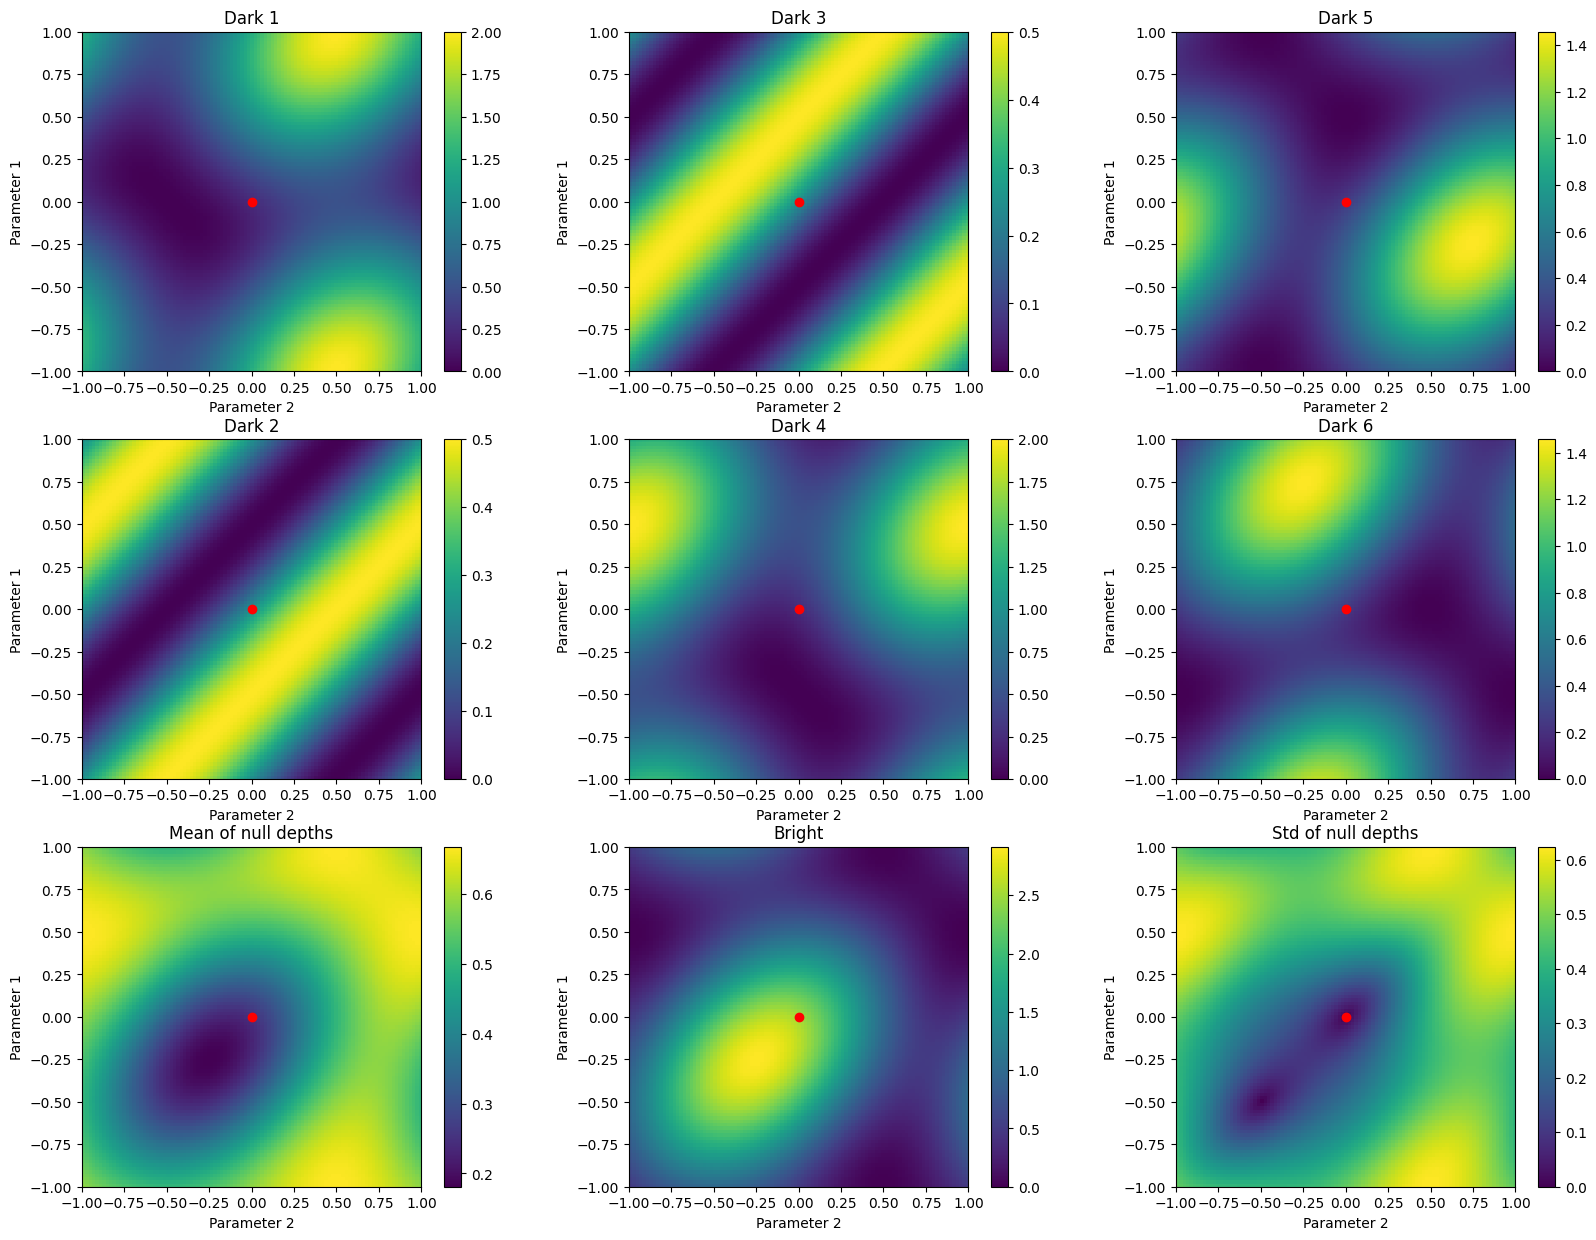

In [ ]:
utils.scan(
    kn=kn0, 
    beams=star_light,
    scan_on=(1,2),
    initial_parameters=[0, 0, -0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    optimized_parameters=optimized_parameters,
    plot_intermediate_states=False 
)